In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 3 (90-5-5).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,18,20,0,32,0,8,98.4,53.3,109,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,10,19,5,39,7,5,90.8,53.0,108,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,38,28,6,30,0,0,89.5,53.4,106,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,25,22,8,45,0,8,82.6,56.4,106,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,16,22,5,47,0,9,79.8,57.2,106,Train


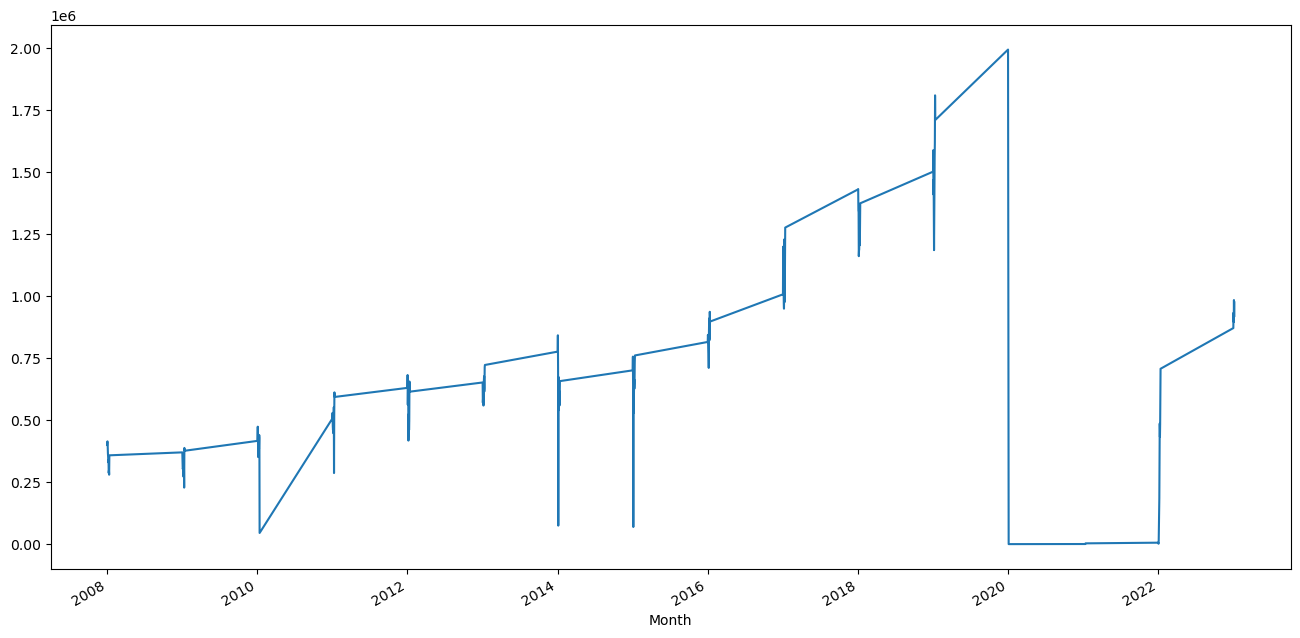

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Month                                                              
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Month                                         

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.21 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.17 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.07 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.31 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.21 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.20 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.06 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/12/2021'].dropna()
test = df1['Tourist Arrival']['01/01/2022':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/12/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/01/2022':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20600D+01    |proj g|=  1.76674D-04


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   26      4      7      1     0     0   8.148D-06   1.206D+01
  F =   12.059458464880109     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2025.989
Date:                            Wed, 23 Aug 2023   AIC                           4103.978
Time:                                    21:38:42   BIC                           4183.107
Sample:                                         0   HQIC                          4136.118
                                            - 168                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts            79.6455    399.893      0.199      0.842    -704.131     863.422
Number of Comments         41.2333     39.273      1.050      0.294     -35.741     118.207
Airbnb Vietnam           -903.3646   2181.894     -0.414      0.679   -5179.799    3373.069
Vietnam restaurant       2889.4306   2535.804      1.139      0.255   -2080.654    7859.516
Shopping in Hanoi         295.2941   2845.848      0.104      0.917   -5282.466    5873.054
Shopping in Ho Chi Minh   782.2480   2860.270      0.273      0.784   -4823.778    6388.274
 Vietnam tour            1803.2262   3891.795      0.463      0.643   -5824.551    9431.003
 Skyscanner              6321.8580   3815.396      1.657      0.098   -1156.180    1.38e+04
 Vietnam visa            4146.1310   3752.800      1.105      0.269   -3209.221    1.15e+04
 Vietnam airport        -1593.8956   3573.568     -0.446      0.656   -8597.961    5410.169
 Vietnam flights        -1011.7464   3549.964     -0.285      0.776   -7969.548    5946.055
 Danang airport           616.5906   1552.955      0.397      0.691   -2427.145    3660.326
 Hoi An                 -2262.7217   1913.785     -1.182      0.237   -6013.671    1488.228
 Vietnam weather         -363.6519   1919.435     -0.189      0.850   -4125.675    3398.371
 Visa for Vietnam        1278.9785   4221.508      0.303      0.762   -6995.024    9552.981
 Sgn airport             1797.5116   2135.953      0.842      0.400   -2388.880    5983.903
 Phu Quoc                3429.3307   1884.790      1.819      0.069    -264.790    7123.452
 Vietnam itinerary      -2097.9013   2684.887     -0.781      0.435   -7360.183    3164.381
 Vietnam trip            3887.3059   1919.714      2.025      0.043     124.735    7649.877
 Things to do in Hue     4041.6715   3216.304      1.257      0.209   -2262.168    1.03e+04
 Vietnam backpackers    -5907.7360   3079.637     -1.918      0.055   -1.19e+04     128.241
CCI                     -2942.2617   4048.675     -0.727      0.467   -1.09e+04    4992.996
PMI                     -2877.9997   5472.732     -0.526      0.599   -1.36e+04    7848.357
REERI                   -6554.2087   9710.237     -0.675      0.500   -2.56e+04    1.25e+04
ar.S.L12                    0.3715      0.074      5.025      0.000       0.227       0.516
sigma2                   1.322e+10      0.007   2.03e+12      0.000    1.32e+10    1.32e+10
===================================================================================
Ljung-Box (L1) (Q):                  16.67   Jarque-Bera (JB):               214.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.25
Prob(H) (two-sided):                  0.86   Kurtosis:                         8.75
=============================================

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 320556.1845442901


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 281803.16758509516


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 15.401703313327321


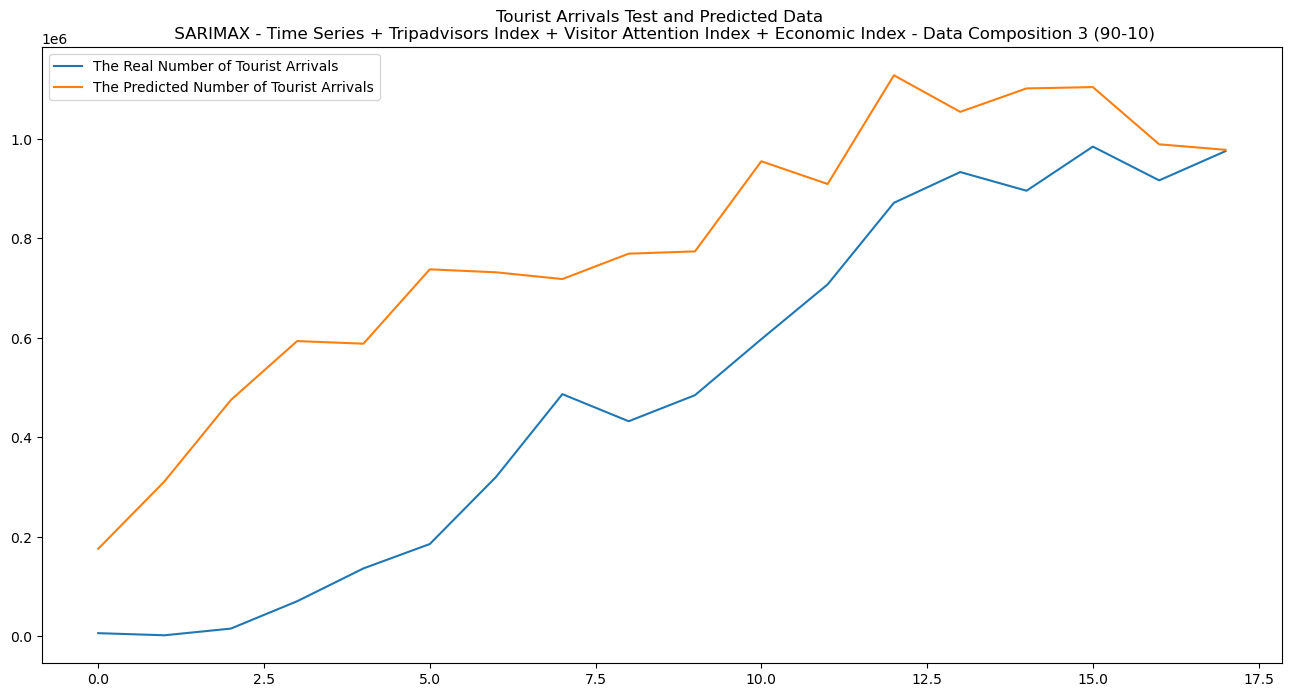

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index + Economic Index - Data Composition 3 (90-10)")
plt.legend()
plt.show()